# Análisis exploratorio de la producción de petróleo y gas en la Cuenca Neuquina en el año 2022

## INTRODUCCIÓN

Como inspiración de proyecto final del "Curso para Crear tus Proyectos de Ciencia de Datos" de Platzi es que realizo este análisis sobre los datos de producción de petróleo y gas en el año 2022.

La idea es practicar la exploración y análisis de datos reales con el objetivo de responder algunas preguntas interesantes como:

* ¿Cuáles son las provincias que abarca a la cuenca neuquina?
* ¿Cómo es la evolución de la producción de gas y petróleo en la cuenca neuquina?
* ¿Cuáles son las empresas que mayor producción tuvieron?
* ¿Cuales son las áreas de concesión que mas producción registraron?
* ¿Cuál es la formación geológica desde donde se obtiene la mayor producción?
* ¿Cuál es la tecnología obtiene la mayor producción de gas y petróleo?

Los datos fueron extraídos de https://datos.gob.ar/dataset/energia-produccion-petroleo-gas-por-pozo-capitulo-iv/archivo/energia_876b3746-85e2-4039-adeb-b1354436159f, propocionados por la Secretaría de Energía de la Nación Argentina.

La idea es empezar con el análisis de 2022, para luego continuar con otros años de análisis que se encuentran disponibles en la misma fuente citada.

## LIBRERÍAS

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

## EXPLORACIÓN Y LIMPIEZA

### Carga de los datos y exploración inicial

Vamos a cargar el conjunto de datos completos, vamos a ver de que se trata y luego vamos a hacer una selección de los datos que necesitamos para el análisis.

In [9]:
prodCompleto_22 = pd.read_csv('./Datasets/produccin-de-pozos-de-gas-y-petrleo-2022.csv')

C:\Users\Marco\AppData\Local\Temp\ipykernel_13756\3827011130.py:1: DtypeWarning: Columns (16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  prodCompleto_22 = pd.read_csv('./Datasets/produccin-de-pozos-de-gas-y-petrleo-2022.csv')


Aparece un Warning porque las columnas 16 y 36 tienen dos tipos de datos y pandas no sabe cómo definirlas

In [11]:
#Vemos cómo se carga el conjunto de datos
prodCompleto_22.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2022,1,145622,0.0,0.0,0.0,0.0,0.0,0.0,...,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2022-01-31
1,Z001,2022,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,...,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2022-01-31
2,Z001,2022,1,145612,0.0,0.0,0.0,0.0,0.0,0.0,...,Z122,DON JOSE,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2022-01-31
3,Z001,2022,1,145623,0.0,0.0,0.0,0.0,0.0,0.0,...,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2022-01-31
4,Z001,2022,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,...,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2022-01-31


In [13]:
# Veamos que los nombres cada columnas
prodCompleto_22.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto',
       'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data'],
      dtype='object')

In [14]:
#Veamos los tipo de datos en cada columna
prodCompleto_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971882 entries, 0 to 971881
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idempresa               971882 non-null  object 
 1   anio                    971882 non-null  int64  
 2   mes                     971882 non-null  int64  
 3   idpozo                  971882 non-null  int64  
 4   prod_pet                971882 non-null  float64
 5   prod_gas                971882 non-null  float64
 6   prod_agua               971882 non-null  float64
 7   iny_agua                971882 non-null  float64
 8   iny_gas                 971882 non-null  float64
 9   iny_co2                 971882 non-null  float64
 10  iny_otro                971882 non-null  float64
 11  tef                     971882 non-null  float64
 12  vida_util               27502 non-null   float64
 13  tipoextraccion          971746 non-null  object 
 14  tipoestado          

La advertencia para las columnas 16 y 36 es sobre columnas que no vamos a usar, así que no nos vamos a preocupar por transformar o corregir.

Por otra parte vemos que tenemos 971882 registros para el conjunto de datos completo, que incluye la producción de toda la Argentina.

Las columnas que nos van a servir para nuestro análisis son:

    * mes: que vemos están indicados con el número del mes con un entero.
    * prod_pet: nos da la producción de petróleo como flotante, medidos como m3.
    * prod_gas: nos da la producción de gas como flotante, medido en m3.
    * empresa: es la empresa que realiza la producción. Es objeto porque es un string.
    * formacion: es la formación geológica desde donde se realiza la extracción. Es objeto porque es un string.
    * areapermisoconcesion: es el área de concesión donde se encuentra el pozo que extrae la producción. Es objeto porque es un string.
    * cuenca: es el datos que vamos a usar para filtrar nuestros datos, porque sólo queremos la cuenca neuquina. Es objeto porque es un string.
    * provincia: porque la cuenca neuquina esta en varias provincias argentinas. Es objeto porque es un string.
    * tipo_de_recurso: nos va a decir si es mediante la tecnología convencional o no convencional. Es objeto porque es un string.
    

In [21]:
# Vamos a generar un DataFrame de la producción unicamente de la cuenca neuquina
prod_2022 = prodCompleto_22.loc[prodCompleto_22['cuenca'] == 'NEUQUINA',
                                ['mes', 'prod_pet', 'prod_gas', 'empresa', 
                            'formacion', 'areapermisoconcesion', 
                            'provincia', 'tipo_de_recurso']]

In [28]:
# Veamos con cuantos datos nos quedamos
prod_2022.shape

(369327, 8)

In [27]:
#Veamos la relación de registros pertenecientes a la cuenca neuquina
cant_registros_Neuquina = prod_2022.shape[0]
cant_registros_original = prodCompleto_22.shape[0]
cant_registros_Neuquina/cant_registros_original

0.3800121825489103

Es decir, el 38% de los registros del conjunto de datos son de la cuenca neuquina.

In [26]:
#Veamos como se ve la tabla
prod_2022.head()

,mes,prod_pet,prod_gas,empresa,formacion,areapermisoconcesion,provincia,tipo_de_recurso
0,1,0.0,0.0,PETROLERA DEL COMAHUE S.A.,punta rosada,GENERAL ROCA,Rio Negro,CONVENCIONAL
1,1,0.0,0.0,PETROLERA DEL COMAHUE S.A.,formación improductiva,PUESTO SURVELIN,Rio Negro,CONVENCIONAL
2,1,0.0,0.0,PETROLERA DEL COMAHUE S.A.,punta rosada,DON JOSE,Rio Negro,CONVENCIONAL
3,1,0.0,0.0,PETROLERA DEL COMAHUE S.A.,formación improductiva,GENERAL ROCA,Rio Negro,CONVENCIONAL
4,1,0.0,0.0,PETROLERA DEL COMAHUE S.A.,punta rosada,FLOR DE ROCA,Rio Negro,CONVENCIONAL


In [29]:
#Veamos el tipo de datos y si están todos completos o si nos faltan datos
prod_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369327 entries, 0 to 971881
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mes                   369327 non-null  int64  
 1   prod_pet              369327 non-null  float64
 2   prod_gas              369327 non-null  float64
 3   empresa               369327 non-null  object 
 4   formacion             368283 non-null  object 
 5   areapermisoconcesion  369327 non-null  object 
 6   provincia             369327 non-null  object 
 7   tipo_de_recurso       369327 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.4+ MB


No nos faltan datos pero vemos que hay filas que tienen datos de producción de gas y petróleo en cero, esto es porque seguramente estaban registrando producción de agua o inyección de otros tipos.

Vamos a borrar las filas que tienen producción de gas y petróleo de cero, para que no sean muchos registros.

In [30]:
# con ~ nos quedamos con las filas que no cumplen con esta condición
prod_2022 = prod_2022.loc[~(prod_2022['prod_pet'] == 0) & ~(prod_2022['prod_gas'] == 0)]

In [32]:
prod_2022.head()

,mes,prod_pet,prod_gas,empresa,formacion,areapermisoconcesion,provincia,tipo_de_recurso
301,1,48.04,1.03,YPF S.A.,centenario,SEÑAL CERRO BAYO,Neuquén,CONVENCIONAL
316,1,21.51,0.35,YPF S.A.,rayoso,CHACHAHUEN SUR,Mendoza,CONVENCIONAL
318,1,35.81,21.78,YPF S.A.,quintuco,LOMA LA LATA - SIERRA BARROSA,Neuquén,CONVENCIONAL
319,1,69.70,53.28,YPF S.A.,vaca muerta,LOMA CAMPANA,Neuquén,NO CONVENCIONAL
326,1,73.90,605.01,YPF S.A.,sierras blancas,LOMA CAMPANA,Neuquén,CONVENCIONAL


In [114]:
# Veamos cuales son todas las variables categóricas que tenemos

lista_columnas = ['mes', 'empresa', 'formacion', 
          'areapermisoconcesion', 'provincia', 'tipo_de_recurso']

for i in lista_columnas:
    print('COLUMNA: ', i)
    print(prod_2022[i].unique())
    print('--> Cantidad de valores únicos: ', prod_2022[i].nunique())
    print('-'*100)

COLUMNA:  mes
[ 1  2  3  4  5  6  7  8  9 10 11 12]
--> Cantidad de valores únicos:  12
----------------------------------------------------------------------------------------------------
COLUMNA:  empresa
['YPF S.A.' 'VISTA ENERGY ARGENTINA SAU' 'VENOIL S.A.'
 'VISTA OIL & GAS ARGENTINA SAU' 'TECPETROL S.A.' 'TOTAL AUSTRAL S.A.'
 'SHELL ARGENTINA S.A.' 'ROCH S.A.' 'PETROLERA EL TREBOL S.A.'
 'PETROLEOS SUDAMERICANOS S.A.' 'PRESIDENT PETROLEUM S.A.'
 'PLUSPETROL S.A.' 'PATAGONIA ENERGY S.A.'
 'PETROQUIMICA COMODORO RIVADAVIA S.A.' 'PAMPETROL S.A.P.E.M'
 'PAMPA ENERGIA S.A.' 'PAN AMERICAN ENERGY SL' 'OILSTONE ENERGIA S.A.'
 'MEDANITO S.A.' 'KILWER S.A.' 'MADALENA ENERGY ARGENTINA SRL '
 'GRECOIL y CIA. S.R.L.' 'GEOPARK ARGENTINA LTD. (SUCURSAL ARGENTINA)'
 'EXXONMOBIL EXPLORATION ARGENTINA S.R.L.'
 'ENERGIA COMPAÑIA PETROLERA S.A.' 'CAPETROL ARGENTINA S.A.'
 'CHEVRON ARGENTINA S.R.L.' 'CAPEX S.A.'
 'ALIANZA PETROLERA ARGENTINA S.A.' 'Petrolera Aconcagua Energia S.A.']
--> Cantidad de v

Vemos que:
    
    * Todos los meses de 2022
    * Tenemos 30 empresas trabajando en la cuenca Neuquina
    * La explotación se esta haciendo en 26 formaciones georlógicas
    * Hay 129 áreas de concesión relacionadas con la producción informada para el 2022
    * La Cuenca Neuquina abarca 4 provincias
    * Hay 2 tecnologías de extracción del recurso

## ANÁLISIS PARA EL 2022

### Producción por mes

Veamos cómo fue la producción de gas y petróleo por mes.

In [41]:
# Calculamos la producción de gas y petroleo en Millones de m3
prod_2022_mes = prod_2022.groupby('mes').sum()/1000000
prod_2022_mes

,prod_pet,prod_gas
mes,,
1,1.540488,1.734963
2,1.379174,1.478008
3,1.555330,1.798837
4,1.533533,1.718073
5,1.619046,1.918188
6,1.553299,1.866313
7,1.643823,1.890473
8,1.669801,1.890856
9,1.670189,1.787671


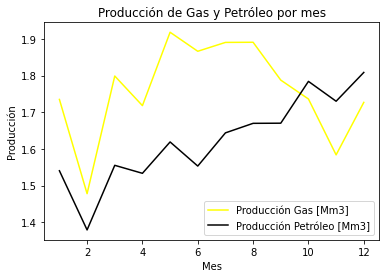

In [44]:
# graficamos la producción por mes
plt.plot(prod_2022_mes.index, prod_2022_mes['prod_gas'], color='yellow', label='Producción Gas [Mm3]')
plt.plot(prod_2022_mes.index, prod_2022_mes['prod_pet'], color='black', label='Producción Petróleo [Mm3]')

# agregamos etiquetas y leyenda a la gráfica
plt.xlabel('Mes')
plt.ylabel('Producción')
plt.title('Producción de Gas y Petróleo por mes')
plt.legend()

# muestramos la gráfica
plt.show()

En principio, se ve una tendendencia similar entre la producción de Gas y Petróleo hasta marzo/abril del 2022 y luego un aumento continuo de la producción de petróleo, mostrando mayores volumenes de producción a partir de octubre que la producción de gas.

### Producción por empresas

Veamos cuál es el ranking de empresas con mayor producción de gas y de petróleo

In [83]:
## con groupby agrupamos por empresa
## con agg sumamos la información de producción por empresa
## con div aplicamos la división de las sumaspor 1 millón, para dar en Mm3
prod_2022_empresa = prod_2022.groupby('empresa').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_2022_empresa

,prod_gas,prod_pet
empresa,,
ALIANZA PETROLERA ARGENTINA S.A.,0.001034,0.010667
CAPETROL ARGENTINA S.A.,0.009163,0.022164
CAPEX S.A.,0.601226,0.143231
CHEVRON ARGENTINA S.R.L.,0.094215,0.288055
ENERGIA COMPAÑIA PETROLERA S.A.,0.000128,0.003059
EXXONMOBIL EXPLORATION ARGENTINA S.R.L.,0.219374,0.438729
GEOPARK ARGENTINA LTD. (SUCURSAL ARGENTINA),0.003911,0.002583
GRECOIL y CIA. S.R.L.,0.001216,0.002701
KILWER S.A.,0.009604,0.124965


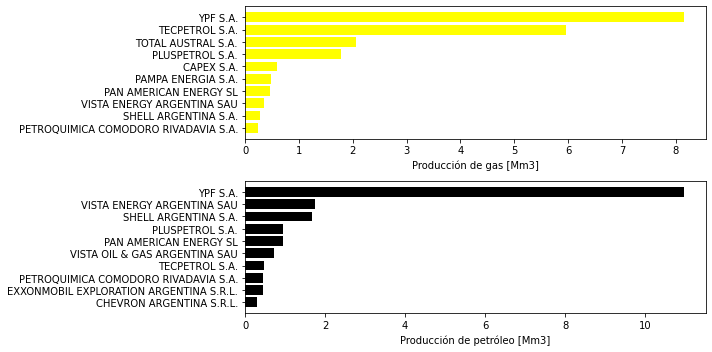

In [89]:
#Creamos fataframe para el caso de producción de gas y petróleo
# para poder ordenarlos para graficar los rankings

# Ordenamos el DataFrame según la producción de gas
## con head(10) hacemos que se muestre solo las 10 empresas con mas producción
prod_2022_empresa_gas = prod_2022_empresa.sort_values(by='prod_gas', ascending=False).reset_index().head(10)

# Ordenamos el DataFrame según la producción de petróleo
prod_2022_empresa_pet = prod_2022_empresa.sort_values(by='prod_pet', ascending=False).reset_index().head(10)

# Grafiquemos las producciones de gas y petróleo para ver los ranking de empresa
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Subgráfico de producción de gas
axs[0].barh(prod_2022_empresa_gas['empresa'], prod_2022_empresa_gas['prod_gas'], color='yellow')
axs[0].set_xlabel('Producción de gas [Mm3]')
axs[0].invert_yaxis()

# Subgráfico de producción de petróleo
axs[1].barh(prod_2022_empresa_pet['empresa'], prod_2022_empresa_pet['prod_pet'], color='black')
axs[1].set_xlabel('Producción de petróleo [Mm3]')
axs[1].invert_yaxis()

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Se puede ver que YPF S.A. lidera la producción de gas y petróleo en la cuenca Neuquina.

### Producción por Área de Concesión

Queremos ver cuáles son las Áreas de Concesión desde donde sale mas producción de gas y petróleo.

In [90]:
## con groupby agrupamos por areapermisoconcesion
## con agg sumamos la información de producción por areapermisoconcesion
## con div aplicamos la división de las sumaspor 1 millón, para dar en Mm3
prod_2022_area = prod_2022.groupby('areapermisoconcesion').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_2022_area

,prod_gas,prod_pet
areapermisoconcesion,,
25 DE MAYO - MEDANITO SUD ESTE LP,0.051844,0.109256
25 DE MAYO - MEDANITO SUD ESTE RN,0.033398,0.129903
AGUA DEL CAJON,0.282289,0.022706
AGUA SALADA,0.285290,0.090595
AGUADA BAGUALES,0.004579,0.032632
...,...,...
SIERRA CHATA,0.127446,0.001012
SIERRAS BLANCAS,0.033400,0.328012
VALLE DEL RIO GRANDE,0.055212,0.145995


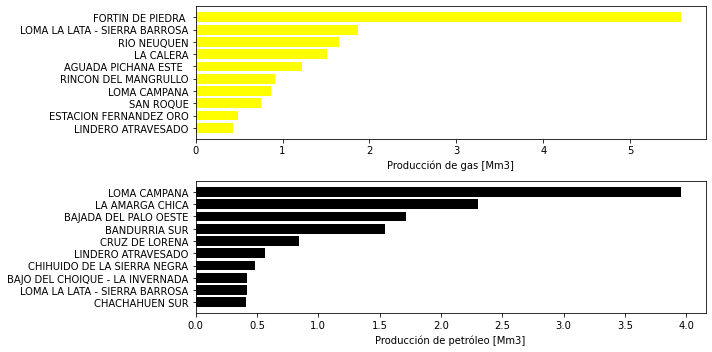

In [92]:
#Creamos fataframe para el caso de producción de gas y petróleo
# para poder ordenarlos para graficar los rankings de áreas

# Ordenamos el DataFrame según la producción de gas
## con head(10) hacemos que se muestre solo las 10 empresas con mas producción
prod_2022_area_gas = prod_2022_area.sort_values(by='prod_gas', ascending=False).reset_index().head(10)

# Ordenamos el DataFrame según la producción de petróleo
prod_2022_area_pet = prod_2022_area.sort_values(by='prod_pet', ascending=False).reset_index().head(10)

# Grafiquemos las producciones de gas y petróleo para ver los ranking de empresa
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Subgráfico de producción de gas
axs[0].barh(prod_2022_area_gas['areapermisoconcesion'], prod_2022_area_gas['prod_gas'], color='yellow')
axs[0].set_xlabel('Producción de gas [Mm3]')
axs[0].invert_yaxis()

# Subgráfico de producción de petróleo
axs[1].barh(prod_2022_area_pet['areapermisoconcesion'], prod_2022_area_pet['prod_pet'], color='black')
axs[1].set_xlabel('Producción de petróleo [Mm3]')
axs[1].invert_yaxis()

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Se observa que el Área Fortín de Piedra, de Tecpetrol S.A., es la que saca mayor volumen de gas y el área Loma Campana, de YPF S.A., es de donde sale la mayor producción de petróleo.

### Prducción por formación geológica

Veamos ahora cual es la formación geológica que mayor producción está generando.

In [93]:
prod_2022_formacion = prod_2022.groupby('formacion').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_2022_formacion

,prod_gas,prod_pet
formacion,,
agrio,0.307364,0.460743
barda negra,0.001031,0.003039
basamento,0.062009,0.038227
catriel,0.007422,0.006624
centenario,0.134889,0.809453
chachao,0.018202,0.017686
challacó,0.002791,0.006137
choiyoi,0.083077,0.228475
formación improductiva,0.014782,0.001999


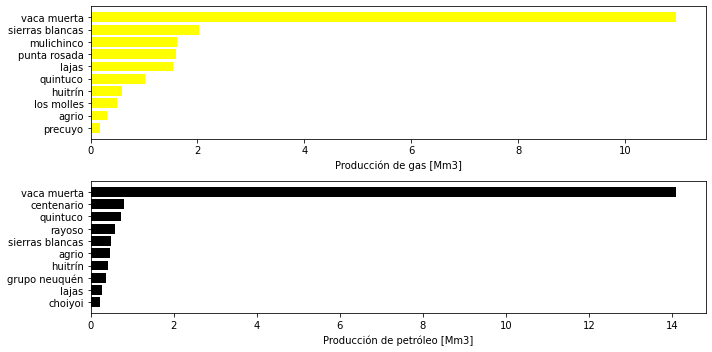

In [94]:
# Grafiquemos
prod_2022_formacion_gas = prod_2022_formacion.sort_values(by='prod_gas', ascending=False).reset_index().head(10)

# Ordenamos el DataFrame según la producción de petróleo
prod_2022_formacion_pet = prod_2022_formacion.sort_values(by='prod_pet', ascending=False).reset_index().head(10)

# Grafiquemos las producciones de gas y petróleo para ver los ranking de empresa
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Subgráfico de producción de gas
axs[0].barh(prod_2022_formacion_gas['formacion'], prod_2022_formacion_gas['prod_gas'], color='yellow')
axs[0].set_xlabel('Producción de gas [Mm3]')
axs[0].invert_yaxis()

# Subgráfico de producción de petróleo
axs[1].barh(prod_2022_formacion_pet['formacion'], prod_2022_formacion_pet['prod_pet'], color='black')
axs[1].set_xlabel('Producción de petróleo [Mm3]')
axs[1].invert_yaxis()

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Por lejos, la mayor producción de gas y petróleo se está obteniendo de la formación Vaca Muerta.

### Producción por tipo de tecnología

Veamos cual es la tecnología que está aportando la mayor producción de gas y petróleo

In [110]:
prod_2022_tecno = prod_2022.groupby('tipo_de_recurso').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_2022_tecno

,prod_gas,prod_pet
tipo_de_recurso,,
CONVENCIONAL,6.306975,5.110532
NO CONVENCIONAL,14.823412,14.377023


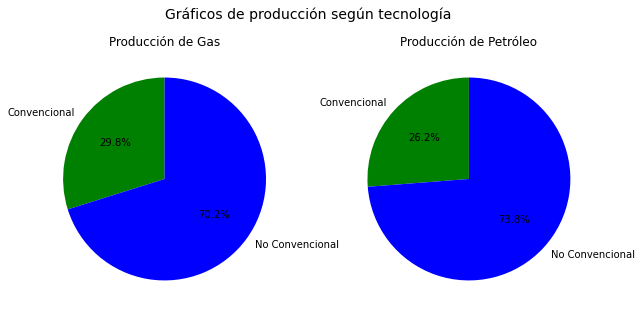

In [113]:
# Creamos una figura y dos ejes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Creamos una lista con los valores de la columna de prod_gas
prod_2022_tecno_gas = prod_2022_tecno['prod_gas']
# Creamos una lista con los valores de la columna de prod_pet
prod_2022_tecno_pet = prod_2022_tecno['prod_pet']

# Colores para la dona de producción 1
prod_2022_tecno_gas_colors = ['green', 'blue']
# Colores para la dona de producción 2
prod_2022_tecno_pet_colors = ['green', 'blue']

# Etiquetas para la dona de producción 1
prod_2022_tecno_gas_labels = ['Convencional', 'No Convencional']
# Etiquetas para la dona de producción 2
prod_2022_tecno_pet_labels = ['Convencional', 'No Convencional']

# Creamos el gráfico de dona para la producción 1
axs[0].pie(prod_2022_tecno_gas, 
           colors=prod_2022_tecno_gas_colors, 
           labels=prod_2022_tecno_gas_labels, 
           autopct='%1.1f%%', startangle=90)
axs[0].set_title('Producción de Gas')

# Creamos el gráfico de dona para la producción 2
axs[1].pie(prod_2022_tecno_pet, 
           colors=prod_2022_tecno_pet_colors, 
           labels=prod_2022_tecno_pet_labels,
           autopct='%1.1f%%', startangle=90)
axs[1].set_title('Producción de Petróleo')

# Agregamos un título a la figura
fig.suptitle('Gráficos de producción según tecnología', fontsize=14)

# Para que veamos fondo blanco
fig.set_facecolor('white')
# Mostramos la figura
plt.show()


### Producción por provincia

Veamos cual es la provincia desde donde se saca la mayor producción de gas y petróleo.

In [95]:
prod_2022_provincia = prod_2022.groupby('provincia').agg({'prod_gas': 'sum', 'prod_pet': 'sum'}).div(1000000)
prod_2022_provincia

,prod_gas,prod_pet
provincia,,
La Pampa,0.230822,0.613344
Mendoza,0.539477,1.671136
Neuquén,18.952042,15.950096
Rio Negro,1.408047,1.252980


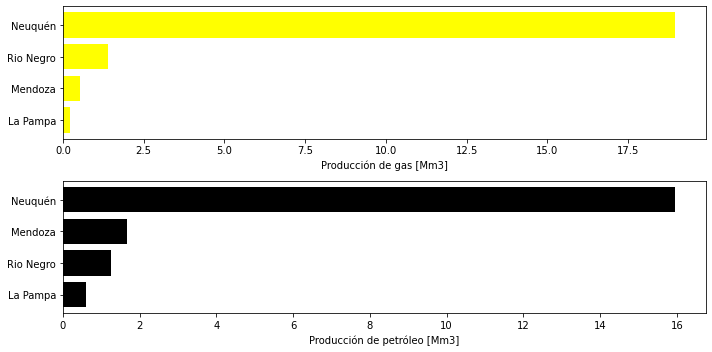

In [96]:
# Grafiquemos
prod_2022_provincia_gas = prod_2022_provincia.sort_values(by='prod_gas', ascending=False).reset_index()

# Ordenamos el DataFrame según la producción de petróleo
prod_2022_provincia_pet = prod_2022_provincia.sort_values(by='prod_pet', ascending=False).reset_index()

# Grafiquemos las producciones de gas y petróleo para ver los ranking de empresa
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Subgráfico de producción de gas
axs[0].barh(prod_2022_provincia_gas['provincia'], prod_2022_provincia_gas['prod_gas'], color='yellow')
axs[0].set_xlabel('Producción de gas [Mm3]')
axs[0].invert_yaxis()

# Subgráfico de producción de petróleo
axs[1].barh(prod_2022_provincia_pet['provincia'], prod_2022_provincia_pet['prod_pet'], color='black')
axs[1].set_xlabel('Producción de petróleo [Mm3]')
axs[1].invert_yaxis()

# Ajustamos el espacio entre subgráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Se observa que por mucho, las mayores producción de gas y petróleo se obtienen de los recursos hidrocarburíferos de la provincia de Neuquén.

## AUTOMATIZACIÓN PARA EXPLORACIÓN Y ANÁLISIS DE OTROS AÑOS

### EXPLORACIÓN

In [107]:
#Guardamos el conjunto de datos
prodCompleto_21 = pd.read_csv('./Datasets/produccin-de-pozos-de-gas-y-petrleo-2021.csv')
#Armamos el dataset con la info que queremos
prod_2021 = prodCompleto_21.loc[prodCompleto_21['cuenca'] == 'NEUQUINA',
                                ['mes', 'prod_pet', 'prod_gas', 'empresa', 
                            'formacion', 'areapermisoconcesion', 
                            'provincia', 'tipo_de_recurso']]
# Sacamos las filas con producción 0
prod_2021 = prod_2021.loc[~(prod_2021['prod_pet'] == 0) & ~(prod_2021['prod_gas'] == 0)]
prod_2021.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_13756\1104313387.py:2: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  prodCompleto_21 = pd.read_csv('./Datasets/produccin-de-pozos-de-gas-y-petrleo-2021.csv')


,mes,prod_pet,prod_gas,empresa,formacion,areapermisoconcesion,provincia,tipo_de_recurso
300,1,25.26,842.65,YPF S.A.,mulichinco,AGUADA DE LA ARENA,Neuquén,CONVENCIONAL
318,1,49.32,1511.21,YPF S.A.,mulichinco,AGUADA DE LA ARENA,Neuquén,CONVENCIONAL
372,1,60.30,1.27,YPF S.A.,rayoso,CHIHUIDO DE LA SIERRA NEGRA,Mendoza,CONVENCIONAL
378,1,2225.80,264.72,YPF S.A.,vaca muerta,LOMA CAMPANA,Neuquén,NO CONVENCIONAL
384,1,2306.65,298.78,YPF S.A.,vaca muerta,LOMA CAMPANA,Neuquén,NO CONVENCIONAL


In [108]:
# Veamos si estan todos los meses del 2021

lista_columnas = ['mes', 'empresa', 'formacion', 
          'areapermisoconcesion', 'provincia', 'tipo_de_recurso']

for i in lista_columnas:
    print('COLUMNA: ', i)
    print(prod_2021[i].unique())
    print('--> Cantidad de valores únicos: ', prod_2021[i].nunique())
    print('-'*100)

COLUMNA:  mes
[ 1  2  3  4  5  6  7  8  9 10 11 12]
--> Cantidad de valores únicos:  12
----------------------------------------------------------------------------------------------------
COLUMNA:  empresa
['YPF S.A.' 'WINTERSHALL DEA ARGENTINA S.A' 'VENOIL S.A.'
 'VISTA OIL & GAS ARGENTINA SAU' 'TECPETROL S.A.' 'TOTAL AUSTRAL S.A.'
 'SAN JORGE PETROLEUM S.A.' 'SHELL ARGENTINA S.A.' 'ROCH S.A.'
 'PETROLERA EL TREBOL S.A.' 'PETROLEOS SUDAMERICANOS S.A.'
 'PRESIDENT PETROLEUM S.A.' 'PLUSPETROL S.A.'
 'PETROQUIMICA COMODORO RIVADAVIA S.A.' 'PAMPETROL S.A.P.E.M'
 'PAMPA ENERGIA S.A.' 'PAN AMERICAN ENERGY SL' 'OILSTONE ENERGIA S.A.'
 'MEDANITO S.A.' 'KILWER S.A.' 'MADALENA ENERGY ARGENTINA SRL '
 'GRECOIL y CIA. S.R.L.' 'GEOPARK ARGENTINA LTD. (SUCURSAL ARGENTINA)'
 'EXXONMOBIL EXPLORATION ARGENTINA S.R.L.'
 'ENERGIA COMPAÑIA PETROLERA S.A.' 'CAPETROL ARGENTINA S.A.'
 'CHEVRON ARGENTINA S.R.L.' 'CAPEX S.A.'
 'Petrolera Aconcagua Energia S.A.']
--> Cantidad de valores únicos:  29
----------

## CONCLUSIONES

Luego del análsis realizado podemos responder a todas las preguntas:

* **¿Cuáles son las provincias que abarca a la cuenca neuquina?**

La cuenca Neuquina abarca las provincias de Neuquén, mendoza, Río Negro y La Pampa. Pudimos ver que Neuquén es por mucho la mayor productora de gas y petróleo de la cuenca.

* **¿Cómo es la evolución de la producción de gas y petróleo en la cuenca neuquina?**

Vimos que a lo largo del 2022 hubo una tendencia creciente en la producción de petróleo, donde superó a la producción de gas a partir de Octube aproximadamente. También se observa la clara relación de la producción de gas con la temporada de invierno.

* **¿Cuáles son las empresas que mayor producción tuvieron?**

Vimos que YPF S.A. es la empresa que lidera la producción de gas y de petróleo. En el caso de la producción de gas, le sigue de cerca la empresa Tecpetrol S.A.

* **¿Cuales son las áreas de concesión que mas producción registraron?**

Vimos que el área Fortín de Piedra, operada por Tecpetrol S.A., es el área que mayor producción de gas sacó en 2022. En cambio, en producción de petróleo, el área con mayor producción es Loma Campana, operado por YPF S.A.

* **¿Cuál es la formación geológica desde donde se obtiene la mayor producción?**

Como era de esperar, la formación geológica de la que mayor producción de gas y petróleo se obtiene es Vaca Muerta.

* **¿Cuál es la tecnología obtiene la mayor producción de gas y petróleo?**

la producción No Convencional es la tecnología que genera la obtención del 70,2% de la producción de Gas y el 73,8% de la producción de petróleo en 2022.